# Table of Contents
 <p><div class="lev1 toc-item"><a href="#ANOVA" data-toc-modified-id="ANOVA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ANOVA</a></div><div class="lev1 toc-item"><a href="#Null-and-Alternative-Hypothesis" data-toc-modified-id="Null-and-Alternative-Hypothesis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Null and Alternative Hypothesis</a></div><div class="lev1 toc-item"><a href="#ANOVA-From-scratch" data-toc-modified-id="ANOVA-From-scratch-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ANOVA From scratch</a></div><div class="lev1 toc-item"><a href="#ANOVA-using-scipy.stats" data-toc-modified-id="ANOVA-using-scipy.stats-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ANOVA using scipy.stats</a></div><div class="lev2 toc-item"><a href="#The-Effect-Size" data-toc-modified-id="The-Effect-Size-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>The Effect Size</a></div><div class="lev1 toc-item"><a href="#ANOVA-Using-statsmodels" data-toc-modified-id="ANOVA-Using-statsmodels-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>ANOVA Using statsmodels</a></div><div class="lev2 toc-item"><a href="#boxplot" data-toc-modified-id="boxplot-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>boxplot</a></div><div class="lev2 toc-item"><a href="#QQ-plot-of-Residuals" data-toc-modified-id="QQ-plot-of-Residuals-52"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>QQ plot of Residuals</a></div><div class="lev1 toc-item"><a href="#Assumption-Checks/Model-Diagnostics" data-toc-modified-id="Assumption-Checks/Model-Diagnostics-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Assumption Checks/Model Diagnostics</a></div><div class="lev2 toc-item"><a href="#Assumption:-Homogeneity-of-Variance" data-toc-modified-id="Assumption:-Homogeneity-of-Variance-61"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Assumption: Homogeneity of Variance</a></div><div class="lev2 toc-item"><a href="#Assumption:-Normality" data-toc-modified-id="Assumption:-Normality-62"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Assumption: Normality</a></div><div class="lev1 toc-item"><a href="#Post-hoc-Testing" data-toc-modified-id="Post-hoc-Testing-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Post-hoc Testing</a></div><div class="lev2 toc-item"><a href="#TUKEY’S-HSD-POST-HOC-COMPARISON" data-toc-modified-id="TUKEY’S-HSD-POST-HOC-COMPARISON-71"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>TUKEY’S HSD POST-HOC COMPARISON</a></div><div class="lev2 toc-item"><a href="#BONFERRONI-CORRECTION-POST-HOC-COMPARISON" data-toc-modified-id="BONFERRONI-CORRECTION-POST-HOC-COMPARISON-72"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>BONFERRONI CORRECTION POST-HOC COMPARISON</a></div><div class="lev2 toc-item"><a href="#ANOVA-Results-Interpretation" data-toc-modified-id="ANOVA-Results-Interpretation-73"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>ANOVA Results Interpretation</a></div>

# ANOVA

To test independence of two samples we use Welch's t-test.  
But for more than two samples we use ANOVA.


ANOVA Assumptions
We'll be looking at SAT scores for five different districts in New York City. Specifically, we'll be using "scores.csv" from Kaggle. First let's get the assumptions out of the way:

- The dependent variable (SAT scores) should be continuous.
- The independent variables (districts) should be two or more categorical groups.
- There must be different participants in each group with no participant being in more than one group. In our case, each school cannot be in more than one district.
- The dependent variable should be approximately normally distributed for each category.
- Variances of each group are approximately equal.

In [65]:
import numpy as np
import pandas as pd

import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 8]
plt.style.use('fivethirtyeight')
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

In [55]:
df = pd.DataFrame({'a':[1,2,5],
                   'b': [2,4,2],
                   'c': [2,3,4]})
df

,a,b,c
0,1,2,2
1,2,4,3
2,5,2,4


# Null and Alternative Hypothesis

Null Hypothesis:  
There are no significant differences between the groups' mean
$$
H _ { 0 } : \mu _ { 1 } = \mu _ { 2 } = \mu _ { 3 }
$$


Alternative Hypothesis:  
There is a significant difference between at least two groups' means  
$$
H _ { a } : \mu _ { i } \neq \mu _ { j } \text{ for at least one i or j}
$$

# ANOVA From scratch
https://youtu.be/q48uKU_KWas

- https://www.danielsoper.com/statcalc/calculator.aspx?id=4
- https://mathcracker.com/f-critical-values.php#results

df_numerator = 2, df_denom = 6, alpha = 0.05 gives F_crit = 5.14

http://socr.ucla.edu/Applets.dir/F_Table.html  (look at alpha = 0.05 not 0.01)

In [38]:
import scipy

F_crit = scipy.stats.f.ppf(q=1-0.05, dfn=2, dfd=6) # dfNumerator=2 and dfDenominator=6
F_crit

5.1432528497847176

![](f_table_youtube.png)

In [33]:
k = df.shape[1]
N = df.size

DFb = k - 1
DFw = N - k
DFt = N - 1

DFb,DFw, DFt

(2, 6, 8)

In [20]:
# feature means
means = df.mean(axis=0)
means

0    2.666667
1    2.666667
2    3.000000
dtype: float64

In [28]:
# grand mean
Xbar = df.values.ravel().mean()
Xbar

2.7777777777777777

In [26]:
# total sum of squares
SSt = (df - df.values.ravel().mean()).pow(2).sum().sum()
SSt

13.555555555555557

In [30]:
# ss within
SSw = (df-df.mean()).pow(2).sum().sum()
SSw

13.333333333333334

In [31]:
# SS between
SSb = SSt - SSw
SSb

0.22222222222222321

In [34]:
# Mean Squared between and within
MSb = SSb / DFb
MSb

0.1111111111111116

In [35]:
MSw = SSw/ DFw
MSw

2.2222222222222223

In [36]:
F = MSb / MSw
F

0.050000000000000218

In [50]:
F_statistic = F
F_crit = F_crit
alpha = 0.05

if F_statistic < F_crit:
    print('We can NOT to reject the Null Hypothesis H0.\nMeans are significantly similar.')
else:
    print('We can reject the Null Hypothesis H0.\nMeans are significantly different.')

We can NOT to reject the Null Hypothesis H0.
Means are significantly similar.


# ANOVA using scipy.stats

In [56]:
F, p = stats.f_oneway(df.a.values,
                      df.b.values,
                      df.c.values)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', F)
print ('P value:', p, '\n')

One-way ANOVA
F value: 0.05
P value: 0.951621501359 



In [52]:
alpha = 0.05
p_value = p

if p_value >= alpha:
    print('We can NOT to reject the Null Hypothesis H0.\nMeans are significantly similar.')
else:
    print('We can reject the Null Hypothesis H0.\nMeans are significantly different.')

We can NOT to reject the Null Hypothesis H0.
Means are significantly similar.


In [53]:
p = stats.f.sf(F, DFb, DFw)
p

0.95162150135914492

## The Effect Size
We can calculate the magnitude of the effect to determine how large the difference is. 
One of the measures we can use is Eta-squared.

$$
S S _ { \text {total} } = \sum \left( x _ { i } - \overline { x _ { G } } \right) ^ { 2 }
$$

G is grand.

The general rules of thumb given by Cohen and Miles & Shevlin (2001) for analyzing eta-squared, $\eta^2$:
http://core.ecu.edu/psyc/wuenschk/docs30/EffectSizeConventions.pdf

- Small effect: $ 0.01 $
- Medium ffect: $ 0.06 $
- Large effect: $ 0.14 $

In [54]:
eta_sqrd = SSb/SSt
eta_sqrd

0.01639344262295089

# ANOVA Using statsmodels

https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/

In [60]:
# we need response y to fit ols

In [69]:
df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv',index_col=0)
print(df.shape)
df.head()

(30, 2)


,weight,group
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
4,6.11,ctrl
5,4.50,ctrl


In [109]:
model = smf.ols('weight ~ C(group)',data=df) # C means categorical
result = model.fit()
                
aov_table = sm.stats.anova_lm(result, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(group),3.76634,2.0,4.846088,0.01591
Residual,10.49209,27.0,NaN,NaN


In [104]:
eta_sq = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0] + aov_table['sum_sq'][1])
aov_table['sum_sq'][0],aov_table['sum_sq'][1],  eta_sq

(3.7663399999999991, 10.492090000000001, 0.2641482968321196)

In [105]:
def eta_squared(aov):
    aov['eta_sq'] = 'NaN'
    aov['eta_sq'] = aov[0:-1]['sum_sq']/sum(aov['sum_sq'])
    return aov

def omega_squared(aov):
    mse = aov['sum_sq'][-1]/aov['df'][-1]
    aov['omega_sq'] = 'NaN'
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*mse))/(sum(aov['sum_sq'])+mse)
    return aov


eta_squared(aov_table)
omega_squared(aov_table)

,sum_sq,df,F,PR(>F),eta_sq,omega_sq
C(group),3.76634,2.0,4.846088,0.01591,0.264148,0.204079
Residual,10.49209,27.0,NaN,NaN,NaN,NaN


## boxplot

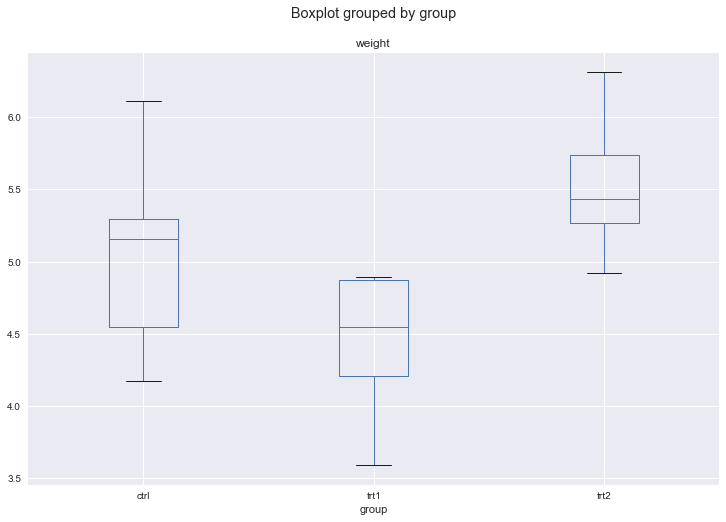

In [106]:
df.boxplot('weight', by='group', figsize=(12, 8))

## QQ plot of Residuals

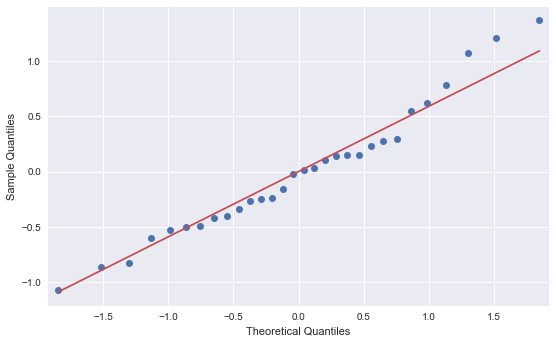

In [110]:
resids = result.resid
fig = sm.qqplot(resids, line='s')
plt.show()

# Assumption Checks/Model Diagnostics

https://pythonfordatascience.org/anova-python/

## Assumption: Homogeneity of Variance

In [115]:
print(df.group.unique())
df.head()

['ctrl' 'trt1' 'trt2']


,weight,group
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
4,6.11,ctrl
5,4.50,ctrl


In [116]:
stats.levene(df.weight[df.group == 'ctrl'],
            df.weight[df.group == 'trt1'],
            df.weight[df.group == 'trt2'])

LeveneResult(statistic=1.1191856948703909, pvalue=0.34122662412547372)

pvalue > alpha (=0.05).

Levene’s test for homogeneity of variance is not significant which indicates
that the groups have equal variances.

## Assumption: Normality
The assumption of normality is tested on the residuals as a whole which is
how the diagnostic information provided by statsmodels tests the residuals.

One could use the Jarque-Bera test provided, or one could use Shapiro or others.

I will demonstrate how to test for normality using the Shapiro method. 

The output is not labelled, but the numbers are the test statistic value followed by the p-value.
The official documentation can be found [here](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.shapiro.html).

In [118]:
stats.shapiro(result.resid)

(0.9660681486129761, 0.43789875507354736)

In [119]:
# The results from the Shapiro-Wilk test is not statistically significant
# which indicates that the residuals are normally distributed.

# Post-hoc Testing

https://pythonfordatascience.org/anova-python/


The overall model was significant, now to test which groups differ. Deciding which groups to compare should be theory driven. There are a few different techniques that can be used. Each of these techniques have different ways of controlling for familywise error rate. 3 common methods are:

- Fisher’s Least Significant Difference (LSD): Take the groups you want to compare and conduct multiple t-tests. This method requires that the ANOVA model be significant. This method is easy, but receives push back since it doesn’t account for familywise error rate. The argument is that since the overall model was significant, one is protected from increasing the familywise error rate.
- Bonferroni correction: Take the alpha the ANOVA was tested at, 0.05, then divide it by the number of planned comparisons. In this case, 0.05/3 = 0.0167. A post-hoc test would have to have an alpha level < 0.0167 to be considered significant. To test the groups, conduct multiple t-tests, but set the alpha value to the corrected value. This method is quick, but often considered too conservative.
- Tukey’s HSD: Method also controls for familywise error rate with a different method than Bonferroni, and is also considered conservative.


There are many other techniques out there that can be used for post-hoc testing each with different guidelines for when they should be used, you are encouraged to learn about them!

## TUKEY’S HSD POST-HOC COMPARISON

The Tukey HSD post-hoc comparison test controls for type I error and maintains the familywise error rate at 0.05 (FWER= 0.05 top of the table). The group1 and group2 columns are the groups being compared, the meandiff column is the difference in means of the two groups being calculated as group2 – group1, the lower/upper columns are the lower/upper boundaries of the 95% confidence interval, and the reject column states whether or not the null hypothesis should be rejected. Unfortunately, this method currently does not provide the t-statistic so treatment effect size cannot be calculated.

In [120]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df['weight'], df['group'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 ctrl   trt1   -0.371  -1.0621 0.3201 False 
 ctrl   trt2   0.494   -0.1971 1.1851 False 
 trt1   trt2   0.865    0.1739 1.5561  True 
--------------------------------------------


## BONFERRONI CORRECTION POST-HOC COMPARISON
First the corrected p-value needs to be calculated. This can be done using the formula:

```
p-value/# of comparisons = 0.05/3 = 0.01667
```

Now the t-tests that are conducted have to have a p-value less 
than 0.01667 in order to be considered significant.

Look for p-value < 0.01667 (this is p_value_bonferroni_corrected)

In [121]:
stats.ttest_ind(df['weight'][df['group'] == 'ctrl'], df['weight'][df['group'] == 'trt1'])

Ttest_indResult(statistic=1.1912603818487009, pvalue=0.24902316597300669)

In [122]:
stats.ttest_ind(df['weight'][df['group'] == 'ctrl'], df['weight'][df['group'] == 'trt2'])

Ttest_indResult(statistic=-2.1340204531240654, pvalue=0.046851384911573583)

In [124]:
stats.ttest_ind(df['weight'][df['group'] == 'trtl'], df['weight'][df['group'] == 'trt2'])

Ttest_indResult(statistic=nan, pvalue=nan)

In [126]:
# df

comparion: 
```
libido = weight
dose = group

high dose and placebo had p-value < 0.05
ctrl and trt2 has p-value < 0.05
statistic = 3.06 and p-value=0.25 (there is typo t-statistic=1.21 was used)

high dose = group trt2
placebo = ctrl
statistic=-2.134 and p-value=0.04
```
Using the Bonferroni correction, we found these are significantly different with p-value < 0.01667:
NOTHING.



From this article: https://doi.org/10.3389/fpsyg.2013.00863

Eta-squared and omega-squared share the same suggested ranges for 

``` 
low (0.01 – 0.059)  
medium (0.06 – 0.139)
large (0.14+)
```effect size classification.

## ANOVA Results Interpretation

For this link https://pythonfordatascience.org/anova-python/

While interpreting the ANOVA results, the Bonferroni post-hoc analysis results will be used.

There was a significant effect of Difficile on the level of libido, F(2,12)= 5.12, p < 0.05, omega_sq = 0.35.

Planned post-hoc testing, using the Bonferroni correction p_value_corrected= 0.0167, revealed that high dose of Difficile significantly increased libido compared to the placebo, t(8)=3.06, p < 0.0167, r= 0.39. There were no other statistically significant differences between groups.